In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pyranges as pr
import pysam

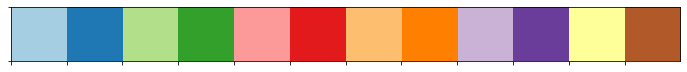

In [71]:
# 设置全局字体
import seaborn as sns
import matplotlib.font_manager as font_manager
font_dirs = ["/public/home/mowp/test/fonts/"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = 12

# setting color palette

pal = sns.color_palette("Paired")
sns.set_palette(pal)
sns.palplot(pal)

In [3]:
infile = '/public/home/mowp/db/Arabidopsis_thaliana/bed/Araport11_protein_coding.201606.bed'
df = pr.read_bed(infile, as_df=True)

In [7]:
df['gene_id'] = df['Name'].map(lambda x: x.split('.')[0])

# nanopore

In [9]:
coding_gene = {gene_id: 0 for gene_id in df['gene_id']}

In [62]:
infile = '/public/home/mowp/data/total_RNA/nanopore_cdna/polyadenylated_data/nanopore_cdna.full_len.bam'
with pysam.AlignmentFile(infile, 'rb') as inbam:
    for read in inbam:
        gene_id = read.get_tag('gi')
        if gene_id in coding_gene:
            coding_gene[gene_id] += 1

In [63]:
counts = [np.log10(v+1) for v in coding_gene.values()] # read counts
counts = np.array(counts)

i = 0
x, y = [], []
while i <= 4:
    mask = (counts <= i) & (counts > i-0.2)
    y.append(len(counts[mask]))
    x.append(i)
    i += 0.2

Text(0, 0.5, 'Gene counts')

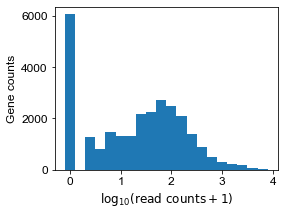

In [64]:
plt.figure(figsize=(4, 3))
plt.bar(x, y, width=0.2, color=pal[1])
plt.xlabel('$\log_{10}\mathrm{(read\ counts + 1)}$')
plt.ylabel('Gene counts')

In [65]:
len(counts[counts>0])

21602

In [82]:
infile = '/public/home/mowp/data/total_RNA/nanopore_cdna/polyadenylated_data/nanopore_cdna.full_len.bam'
nanopore_read_length = []
with pysam.AlignmentFile(infile, 'rb') as inbam:
    for read in inbam:
        polya_len = read.get_tag('pa')
        nanopore_read_length.append(read.query_length+polya_len)

Text(0, 0.5, 'Counts')

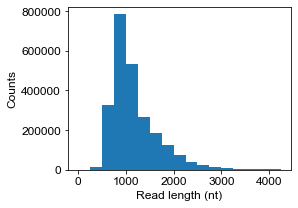

In [83]:
plt.figure(figsize=(4, 3))
xlim=4500
plt.hist(nanopore_read_length, bins=np.arange(0, xlim, 250), color=pal[1])
plt.xlabel('Read length (nt)')
plt.ylabel('Counts')

In [84]:
np.median(nanopore_read_length)

1033.0400009155273

# pacbio

In [39]:
coding_gene = {gene_id: 0 for gene_id in df['gene_id']}

In [40]:
infile = '/public/home/mowp/data/total_RNA/pacbio_cdna/polyadenylated_data/totalRNA.full_len.bam'
with pysam.AlignmentFile(infile, 'rb') as inbam:
    for read in inbam:
        gene_id = read.get_tag('gi')
        if gene_id in coding_gene:
            coding_gene[gene_id] += 1

In [41]:
counts = [np.log10(v+1) for v in coding_gene.values()] # read counts
counts = np.array(counts)

i = 0
x, y = [], []
while i <= 4:
    mask = (counts <= i) & (counts > i-0.2)
    y.append(len(counts[mask]))
    x.append(i)
    i += 0.2

Text(0, 0.5, 'Gene counts')

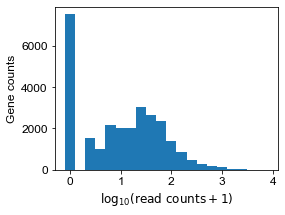

In [61]:
plt.figure(figsize=(4, 3))
plt.bar(x, y, width=0.2, color=pal[1])
plt.xlabel('$\log_{10}\mathrm{(read\ counts + 1)}$')
plt.ylabel('Gene counts')

In [45]:
len(counts[counts>0])

20134

In [46]:
len(coding_gene)

27655

In [79]:
infile = '/public/home/mowp/data/total_RNA/pacbio_cdna/polyadenylated_data/totalRNA.full_len.bam'
pacbio_read_length = []
with pysam.AlignmentFile(infile, 'rb') as inbam:
    for read in inbam:
        pacbio_read_length.append(read.query_length)

Text(0, 0.5, 'Counts')

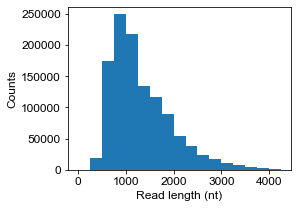

In [80]:
plt.figure(figsize=(4, 3))
xlim=4500
plt.hist(pacbio_read_length, bins=np.arange(0, xlim, 250), color=pal[1])
plt.xlabel('Read length (nt)')
plt.ylabel('Counts')

In [81]:
np.median(pacbio_read_length)

1128.0